In [ ]:
#question(i)
import pandas as pd
Dataset=pd.read_excel("/content/AandE-Admissions_Dataset.xlsx")
Dataset##the original dataframe
Dataset.rename(columns={"Reasons for attendance by day of week and hour of week of arrival at A&E, London, 2016/17":"Day",
                   "Unnamed: 1":"Hour of Arrival",
                   "Unnamed: 2":"Road traffic accident",
                   "Unnamed: 3":"Assault",
                   "Unnamed: 4":"Deliberate self-harm",
                   "Unnamed: 5":"Sports injury",
                   "Unnamed: 6":"Not known"},inplace=True)##change column names
Dataset

,Day,Hour of Arrival,Road traffic accident,Assault,Deliberate self-harm,Sports injury,Not known
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Weekday,Hour of Arrival,Reason for attendance,NaN,NaN,NaN,NaN
2,NaN,NaN,Road traffic accident,Assault,Deliberate self-harm,Sports injury,Not known
3,Monday,00:00:00,101,127,44,36,230
4,Monday,01:00:00,59,92,46,8,185
...,...,...,...,...,...,...,...
166,Sunday,19:00:00,255,113,52,263,211
167,Sunday,20:00:00,253,149,54,225,197
168,Sunday,21:00:00,209,151,81,153,247
169,Sunday,22:00:00,177,137,51,115,318


In [ ]:
df=Dataset.drop([0,1,2])##the new data frame eliminated the excess columns.

In [ ]:
df

,Day,Hour of Arrival,Road traffic accident,Assault,Deliberate self-harm,Sports injury,Not known
3,Monday,00:00:00,101,127,44,36,230
4,Monday,01:00:00,59,92,46,8,185
5,Monday,02:00:00,37,84,*,*,150
6,Monday,03:00:00,32,45,27,11,118
7,Monday,04:00:00,24,56,16,14,93
...,...,...,...,...,...,...,...
166,Sunday,19:00:00,255,113,52,263,211
167,Sunday,20:00:00,253,149,54,225,197
168,Sunday,21:00:00,209,151,81,153,247
169,Sunday,22:00:00,177,137,51,115,318


In [ ]:
#question(ii)
##Check unique values for each column.
Columns=["Day","Hour of Arrival","Road traffic accident","Assault","Deliberate self-harm","Sports injury","Not known"]
for Column in Columns:
  unique_values=df[Column].unique()
  print(f"Unique {Column}:", unique_values)

Unique Day: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
Unique Hour of Arrival: [datetime.time(0, 0) datetime.time(1, 0) datetime.time(2, 0)
 datetime.time(3, 0) datetime.time(4, 0) datetime.time(5, 0)
 datetime.time(6, 0) datetime.time(7, 0) datetime.time(8, 0)
 datetime.time(9, 0) datetime.time(10, 0) datetime.time(11, 0)
 datetime.time(12, 0) datetime.time(13, 0) datetime.time(14, 0)
 datetime.time(15, 0) datetime.time(16, 0) datetime.time(17, 0)
 datetime.time(18, 0) datetime.time(19, 0) datetime.time(20, 0)
 datetime.time(21, 0) datetime.time(22, 0) datetime.time(23, 0)]
Unique Road traffic accident: [101 59 37 32 24 12 30 138 274 325 297 269 264 259 283 327 341 353 357 234
 209 135 90 68 40 42 10 25 21 60 151 271 301 256 216 252 233 270 263 339
 340 253 182 150 93 70 29 18 11 57 152 295 239 220 240 268 338 365 363 166
 113 72 41 13 17 35 80 289 212 210 222 257 364 331 332 173 174 92 84 67 36
 48 148 223 249 232 238 265 318 320 186 159 124 91 94 39 49 

In [ ]:
##Replace missing values in the problematic categories "Sports injury" and "Delibetate self-harm" with each average respectively.
for issue in ["Sports injury","Deliberate self-harm"]:
  df[issue]=pd.to_numeric(df[issue], errors="coerce")
  df[issue]=df[issue].fillna(df[issue].mean())
  df[issue].unique()
  print(f"{issue}:",df[issue].unique())

##Check missing values in all columns
missing_values=df.isnull().sum()
print(missing_values)

##Remove any duplicate and retain the last occurrence.
df.drop_duplicates(keep="last", inplace=True)
df

Sports injury: [ 36.        8.      191.95625  11.       14.       10.       58.
 266.      442.      370.      374.      361.      275.      292.
 301.      316.      360.      338.      326.      287.      226.
 144.       79.       12.       41.      246.      335.      276.
 241.      234.      251.      228.      280.      314.      300.
 245.      248.      227.      175.       89.       34.       15.
   7.       51.      262.      386.      263.      236.      235.
 250.      385.      319.      331.      317.      255.      179.
 100.       37.       20.        9.       18.       66.      269.
 380.      288.      270.      339.      318.      281.      182.
  76.       38.       29.        6.       22.       61.      211.
 321.      272.      253.      243.      217.      249.      210.
 258.      274.      229.      231.      183.      131.       98.
  50.       26.      102.      215.      225.      259.      297.
 382.      453.      413.      142.       46.       40.      

,Day,Hour of Arrival,Road traffic accident,Assault,Deliberate self-harm,Sports injury,Not known
3,Monday,00:00:00,101,127,44.00000,36.00000,230
4,Monday,01:00:00,59,92,46.00000,8.00000,185
5,Monday,02:00:00,37,84,36.13125,191.95625,150
6,Monday,03:00:00,32,45,27.00000,11.00000,118
7,Monday,04:00:00,24,56,16.00000,14.00000,93
...,...,...,...,...,...,...,...
166,Sunday,19:00:00,255,113,52.00000,263.00000,211
167,Sunday,20:00:00,253,149,54.00000,225.00000,197
168,Sunday,21:00:00,209,151,81.00000,153.00000,247
169,Sunday,22:00:00,177,137,51.00000,115.00000,318


In [ ]:
#question(iii)
##Insight 1: Peak hour of attendance
df["hourly total attendances"]=df["Road traffic accident"]+df["Assault"]+df["Deliberate self-harm"]+df["Sports injury"]+df["Not known"]##Add a new column variable
df

,Day,Hour of Arrival,Road traffic accident,Assault,Deliberate self-harm,Sports injury,Not known,hourly total attendances
3,Monday,00:00:00,101,127,44.00000,36.00000,230,538.0
4,Monday,01:00:00,59,92,46.00000,8.00000,185,390.0
5,Monday,02:00:00,37,84,36.13125,191.95625,150,499.0875
6,Monday,03:00:00,32,45,27.00000,11.00000,118,233.0
7,Monday,04:00:00,24,56,16.00000,14.00000,93,203.0
...,...,...,...,...,...,...,...,...
166,Sunday,19:00:00,255,113,52.00000,263.00000,211,894.0
167,Sunday,20:00:00,253,149,54.00000,225.00000,197,878.0
168,Sunday,21:00:00,209,151,81.00000,153.00000,247,841.0
169,Sunday,22:00:00,177,137,51.00000,115.00000,318,798.0


In [ ]:
weekly_total_attendances=df.groupby("Hour of Arrival")["hourly total attendances"].sum()##Group the number of weekly attendances by hours
weekly_total_attendances

,hourly total attendances
Hour of Arrival,
00:00:00,3575.0
01:00:00,2959.0
02:00:00,2883.175
03:00:00,2655.2625
04:00:00,1942.0875
05:00:00,1900.0875
06:00:00,1512.0875
07:00:00,1834.0
08:00:00,4129.0


In [ ]:
print("The hour has the most average attendances in the 7 days is ",weekly_total_attendances.idxmax(),
      "\nThe average attendances in the hour of the week is",weekly_total_attendances[weekly_total_attendances.idxmax()]/7)

The hour has the most average attendances in the 7 days is  09:00:00 
The average attendances in the hour of the week is 1051.7142857142858


In [ ]:
##Insight 2: The highest proportion of the attendance reason for each day and the lowest.
Newcolumns=["Road traffic accident","Assault","Deliberate self-harm","Sports injury","Not known","hourly total attendances"]
daily_total_attendances=df.groupby("Day")[Newcolumns].sum()##Sum the total attendances for each reason in each day
daily_total_attendances

,Road traffic accident,Assault,Deliberate self-harm,Sports injury,Not known,hourly total attendances
Day,,,,,,
Friday,4434,2154,857.0000,3618.0000,6504,17567.0
Monday,4693,2464,905.2625,5277.9125,5510,18850.175
Saturday,4062,3011,821.2625,4406.9125,4065,16366.175
Sunday,3982,3578,882.0000,5120.0000,3934,17496.0
Thursday,4363,2138,855.2625,4785.9125,5816,17958.175
Tuesday,4363,2131,890.2625,4469.9125,4828,16682.175
Wednesday,4528,2045,859.0000,4570.0000,4978,16980.0


In [ ]:
##Calculate proportions for each reason
##create the lists of attendance reasons and days
reasons=["Road traffic accident", "Assault", "Deliberate self-harm", "Sports injury", "Not known"]
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

##create a dictionary stores pairs of "day+reason" and corresponding daily percentages
proportion={}

for day in days:
  Proportions_of_the_day=[]
  for	reason in reasons:
    proportion[day,reason]=daily_total_attendances.loc[day,reason]/daily_total_attendances.loc[day,"hourly total attendances"]
    print("Day:",day,"Reason:",reason,"\nThe proportion of the reason in the attendances:",proportion[day,reason])
    Proportions_of_the_day.append(proportion[day,reason])

  MAX=max(Proportions_of_the_day)
  MIN=min(Proportions_of_the_day)

  def find_key(MAX):
   for key, value in proportion.items():
        if MAX == value:
            return key
  def find_key(MIN):
   for key, value in proportion.items():
        if MIN == value:
            return key

  print(f"The reason occupied the highest percentage of attendance in {day} is: ",find_key(MAX),"\nIts proportion:",MAX)
  print(f"The reason occupied the lowest percentage of attendance in {day} is: ",find_key(MIN),"\nIts proportion:",MIN)

Day: Monday Reason: Road traffic accident 
The proportion of the reason in the attendances: 0.24896320591188145
Day: Monday Reason: Assault 
The proportion of the reason in the attendances: 0.1307149668371779
Day: Monday Reason: Deliberate self-harm 
The proportion of the reason in the attendances: 0.04802408996202953
Day: Monday Reason: Sports injury 
The proportion of the reason in the attendances: 0.27999275868791673
Day: Monday Reason: Not known 
The proportion of the reason in the attendances: 0.2923049786009944
The reason occupied the highest percentage of attendance in Monday is:  ('Monday', 'Not known') 
Its proportion: 0.2923049786009944
The reason occupied the lowest percentage of attendance in Monday is:  ('Monday', 'Deliberate self-harm') 
Its proportion: 0.04802408996202953
Day: Tuesday Reason: Road traffic accident 
The proportion of the reason in the attendances: 0.26153664015633454
Day: Tuesday Reason: Assault 
The proportion of the reason in the attendances: 0.12774113

In [ ]:
##3.The midnight effects on attendances
hourly_attendance_summary=df.groupby("Hour of Arrival")[Newcolumns].sum()
print(hourly_attendance_summary)##aggregates the attendance data subject to arriving hours

hours_of_arrival = df["Hour of Arrival"].unique().tolist()
print(hours_of_arrival)##get the list of hours

hours_of_arrival[1]
print(hours_of_arrival[1])##get 1:00

hours_of_arrival[-1]
print(hours_of_arrival[-1])##get 23:00

                Road traffic accident Assault  Deliberate self-harm  \
Hour of Arrival                                                       
00:00:00                          731     893             349.00000   
01:00:00                          539     860             330.00000   
02:00:00                          406     868             261.26250   
03:00:00                          305     744             228.39375   
04:00:00                          171     671             165.13125   
05:00:00                          207     532             152.13125   
06:00:00                          214     348              97.13125   
07:00:00                          422     287              86.00000   
08:00:00                          913     366             110.00000   
09:00:00                         1561     467             133.00000   
10:00:00                         1762     612             162.00000   
11:00:00                         1658     718             187.00000   
12:00:

In [ ]:
##Average effect:
print("The data set at 23:00 is:\n",hourly_attendance_summary.loc[hours_of_arrival[-1]]/7)##data set at 23:00
print("\nThe data set at 1:00 is:\n",hourly_attendance_summary.loc[hours_of_arrival[1]]/7)##data set at 1:00
print("\n How the data changes when time moves from 23:00 to 1:00 in the next day:\n",hourly_attendance_summary.loc[hours_of_arrival[1]]/7-hourly_attendance_summary.loc[hours_of_arrival[-1]]/7)##find the difference in-between

The data set at 23:00 is:
 Road traffic accident       157.285714
Assault                     129.714286
Deliberate self-harm         52.142857
Sports injury                72.285714
Not known                        238.0
hourly total attendances    649.428571
Name: 23:00:00, dtype: object

The data set at 1:00 is:
 Road traffic accident             77.0
Assault                     122.857143
Deliberate self-harm         47.142857
Sports injury                     18.0
Not known                   157.714286
hourly total attendances    422.714286
Name: 01:00:00, dtype: object

 How the data changes when time moves from 23:00 to 1:00 in the next day:
 Road traffic accident       -80.285714
Assault                      -6.857143
Deliberate self-harm              -5.0
Sports injury               -54.285714
Not known                   -80.285714
hourly total attendances   -226.714286
dtype: object


In [ ]:
##Midnight effects for different time joints:
for day in days:
    next_day = "Monday" if day == "Sunday" else {
        "Monday": "Tuesday", "Tuesday": "Wednesday", "Wednesday": "Thursday",
        "Thursday": "Friday", "Friday": "Saturday", "Saturday": "Sunday"
    }[day]

    previousday23 = df[(df["Day"] == day) & (df["Hour of Arrival"] == hours_of_arrival[-1])]["hourly total attendances"].values[0]
    nextday01 = df[(df["Day"] == next_day) & (df["Hour of Arrival"] == hours_of_arrival[1])]["hourly total attendances"].values[0]
    difference = nextday01 - previousday23
    print(f"The midnight effect between {day} and {next_day} is:",difference)

The midnight effect between Monday and Tuesday is: -232.0
The midnight effect between Tuesday and Wednesday is: -261.0
The midnight effect between Wednesday and Thursday is: -278.0
The midnight effect between Thursday and Friday is: -230.0
The midnight effect between Friday and Saturday is: -151.0
The midnight effect between Saturday and Sunday is: -131.0
The midnight effect between Sunday and Monday is: -304.0


In [ ]:
#question(iv)
import matplotlib.pyplot as plt

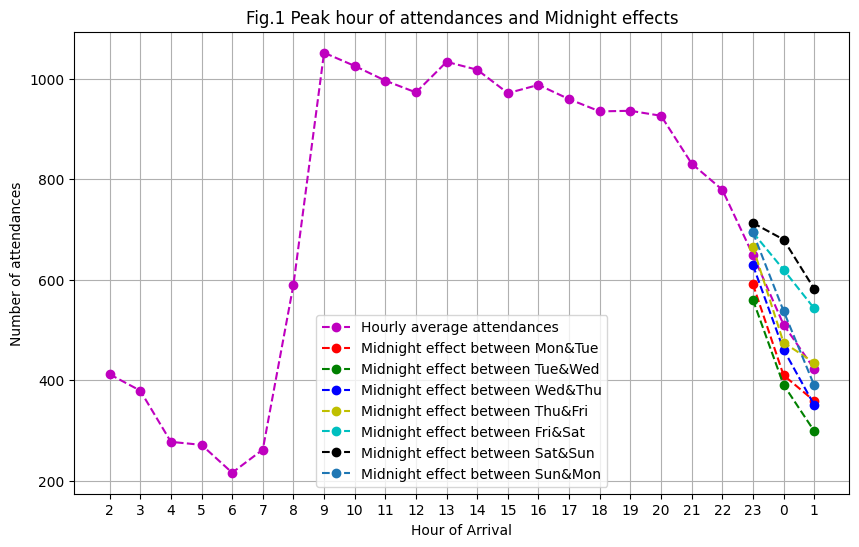

In [ ]:
##Insight 1 and 3:
X_axis42 =[23,0,1]##the new order of hours to visualize the midnight effect.
X_axis41= [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1]
new_order_X41 = [str(h) for h in X_axis41]
new_order_X42 = [str(h) for h in X_axis42]

Y_axis41=[]
for i in X_axis41:
  Y_axis41.append(weekly_total_attendances[hours_of_arrival[i]]/7)

##Redo the midnight effects on different time joints and saved the data of each joint to a dictionary to plot lines on chart.
dictionary={}

for day in days:
    next_day = "Monday" if day == "Sunday" else {
        "Monday": "Tuesday", "Tuesday": "Wednesday", "Wednesday": "Thursday",
        "Thursday": "Friday", "Friday": "Saturday", "Saturday": "Sunday"
    }[day]
    dictionary[f"pair{day}&{next_day}".format(day)] = [df[(df["Day"] == day) & (df["Hour of Arrival"] == hours_of_arrival[-1])]["hourly total attendances"].values[0],
                df[(df["Day"] == next_day) & (df["Hour of Arrival"] == hours_of_arrival[0])]["hourly total attendances"].values[0],
                df[(df["Day"] == next_day) & (df["Hour of Arrival"] == hours_of_arrival[1])]["hourly total attendances"].values[0]]

plt.figure(figsize=(10, 6))
plt.plot(new_order_X41, Y_axis41,"o--m",label="Hourly average attendances")##each bold dot marks an hour and its number of hourly total attendnances.
plt.plot(new_order_X42, dictionary["pairMonday&Tuesday"],"o--r",label="Midnight effect between Mon&Tue")
plt.plot(new_order_X42, dictionary["pairTuesday&Wednesday"],"o--g",label="Midnight effect between Tue&Wed")
plt.plot(new_order_X42, dictionary["pairWednesday&Thursday"],"o--b",label="Midnight effect between Wed&Thu")
plt.plot(new_order_X42, dictionary["pairThursday&Friday"],"o--y",label="Midnight effect between Thu&Fri")
plt.plot(new_order_X42, dictionary["pairFriday&Saturday"],"o--c",label="Midnight effect between Fri&Sat")
plt.plot(new_order_X42, dictionary["pairSaturday&Sunday"],"o--k",label="Midnight effect between Sat&Sun")
plt.plot(new_order_X42, dictionary["pairSunday&Monday"],"o--",label="Midnight effect between Sun&Mon")

plt.legend()
plt.xlabel("Hour of Arrival")
plt.ylabel("Number of attendances")
plt.title("Fig.1 Peak hour of attendances and Midnight effects")
plt.grid()
plt.show()

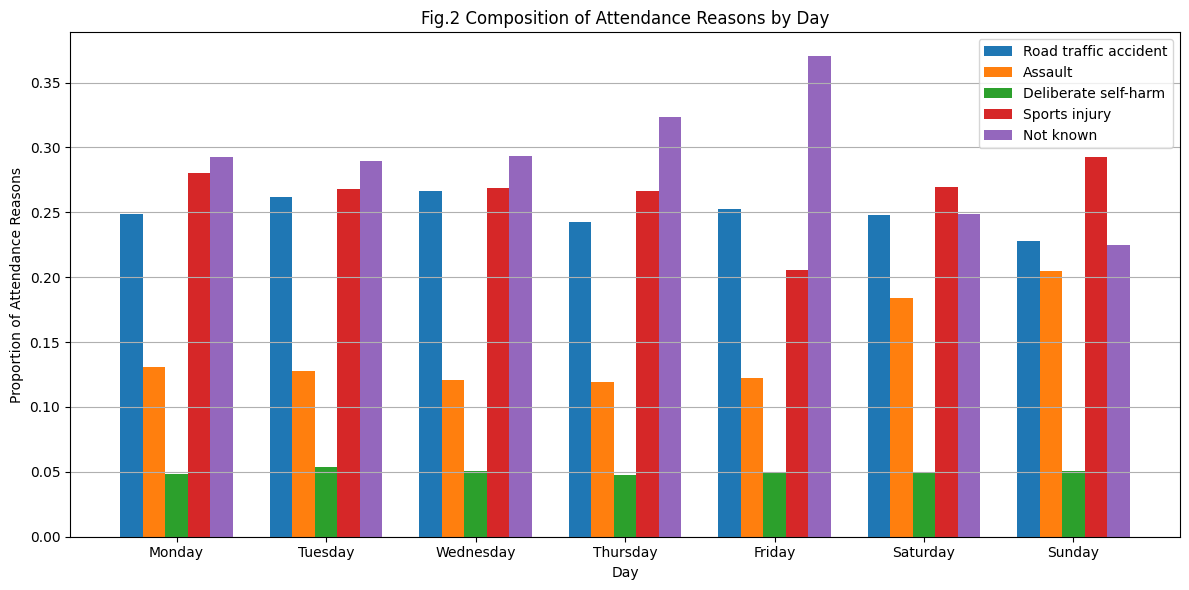

In [ ]:
##Insight 2
##Create a blank chart
plt.figure(figsize=(12, 6))

x_positions = range(len(days))

for i, reason in enumerate(reasons):##Use enumerate() to get the indexes of list "reasons"
    proportions = [proportion[(day, reason)] for day in days]
    plt.bar([x + i * 0.15 for x in x_positions], proportions, 0.15, label=reason)
##use the indexes make bars not overlapping, creating a grouped bar chart that the bar for each reason next to each other at the same day group.

plt.xticks([x + 0.15 * 2 for x in x_positions], days)
plt.xlabel("Day")
plt.ylabel("Proportion of Attendance Reasons")
plt.title("Fig.2 Composition of Attendance Reasons by Day")
plt.legend()
plt.tight_layout()
plt.grid(axis="y")
plt.show()